# PROJECT - APPLIED STATISTICS

In [245]:
# 1. Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [150]:
# 2. Read the data as a dataframe
Insurance_data = pd.read_csv('insurance.csv')

In [151]:
# Checking the data on top
Insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [152]:
# Checking the data at bottom
Insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


3. Perform basic EDA which should include the following and print out your insights at every step

In [153]:
# a. Shape of the data
Insurance_data.shape

(1338, 7)

Thus there are 1338 rows and 7 columns in the dataframe.

In [154]:
# b. Data type of each attribute
Insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [155]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [156]:
# c. Checking the presence of missing values
Insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Hence, there are no missing values.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


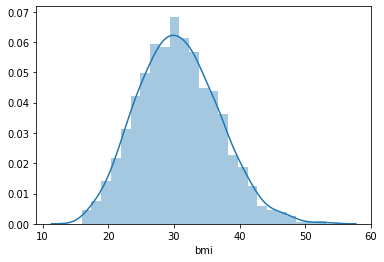

In [158]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
sns.distplot(Insurance_data['bmi'])

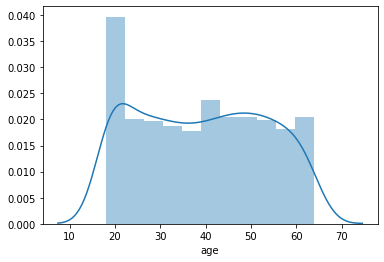

In [159]:
sns.distplot(Insurance_data['age'])

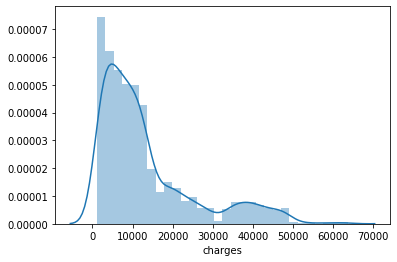

In [160]:
sns.distplot(Insurance_data['charges'])

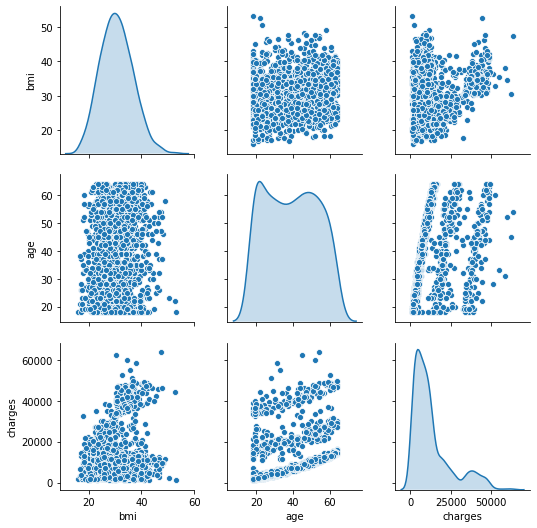

In [161]:
# Alternatively we can go for pair plot to see the histograms along diagonal and also see correlations between attributes
sns.pairplot(Insurance_data[['bmi', 'age', 'charges']], diag_kind = "kde")

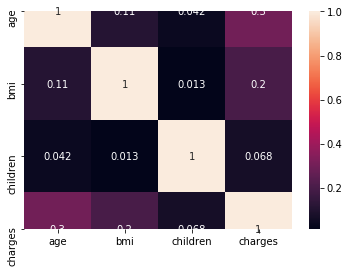

In [162]:
# Also correlation can be obtained from heatmap
corr = Insurance_data.corr()
sns.heatmap (corr, annot = True)


In [163]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
Insurance_data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

From above histograms and calculation of skew, it is concluded that:
1. bmi is right skewed or positive skewed with skewness 0.284047
2. age is sightly right skewed or positive skewed with skewness 0.055673
3. charges is right skewed or positive skewed with skewness 1.515880

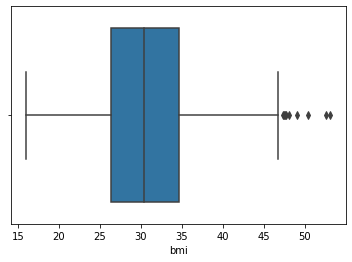

In [164]:
 # g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
sns.boxplot(x=Insurance_data['bmi'])

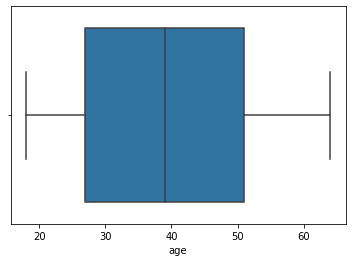

In [165]:
sns.boxplot(x=Insurance_data['age'])

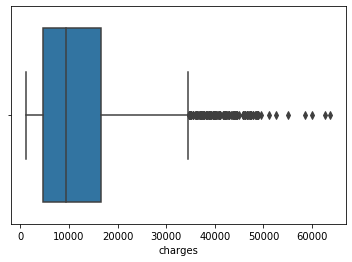

In [166]:
sns.boxplot(x=Insurance_data['charges'])

From the above 3 box plots we can conclude that there are outliers for bmi and charges but no outlies for age. Also it is observed that there are many outliers for charges ie many points more than 1.5 * IQR.

C:\Users\mpani\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


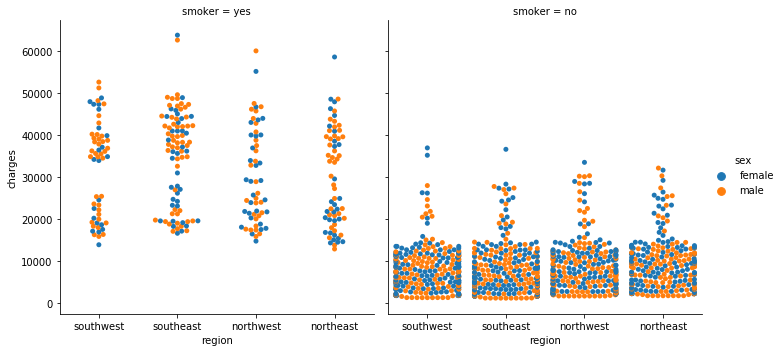

In [167]:
# h. Distribution of categorical columns
sns.factorplot(x="region",  
               y="charges",
               hue="sex", 
               col="smoker", 
               data=Insurance_data, 
               kind="swarm")

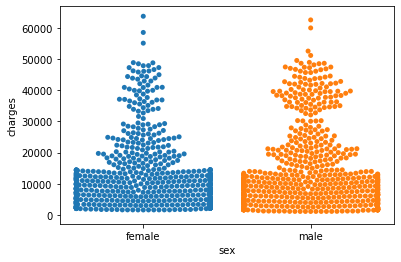

In [260]:
# Also individually plotting for categorical cloums alone:
sns.swarmplot(Insurance_data['sex'], Insurance_data['charges'])

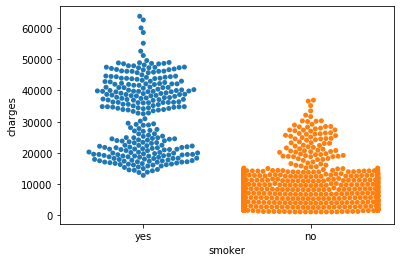

In [169]:
sns.swarmplot(Insurance_data['smoker'], Insurance_data['charges'])

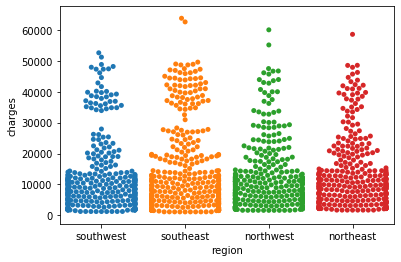

In [170]:
sns.swarmplot(Insurance_data['region'], Insurance_data['charges'])

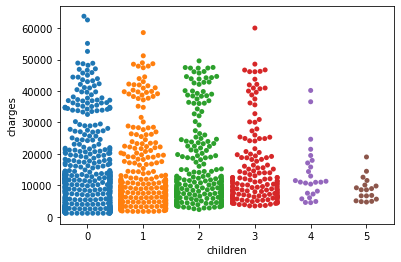

In [261]:
sns.swarmplot(Insurance_data['children'], Insurance_data['charges'])

From the above plots it can be summarized that:
    1. charges are higher for smokers
    2. Relatively same charge for both genders
    3. Relatively same across regions
    4. Cost less for lesser for more number of children, though it cannot be emphasized as the sample is smaller as number of children increases.

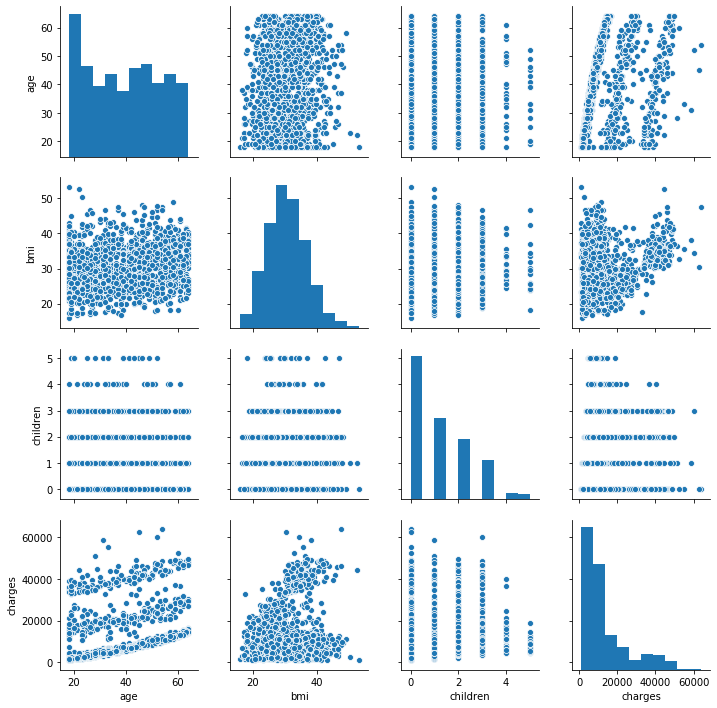

In [171]:
# i. Pair plot that includes all the columns of the data frame
sns.pairplot(Insurance_data)

4. Answer the following questions with statistical evidence 

a. Do charges of people who smoke differ significantly from the people who don't? 
Here, Going for a z test as the sample size > 30.
Firstly, we split the data into two to compare the two sets ie smoker vs non smoker.

In [172]:
Smoker = Insurance_data[Insurance_data['smoker']=="yes"]

In [173]:
Smoker.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [174]:
Non_Smoker = Insurance_data[Insurance_data['smoker']=="no"]

In [175]:
Non_Smoker.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


Thus we have 2 categories: Smoker and Non_Smoker. Lets take Alpha = 0.05. Assumption is mean difference of the two sample will be 0.
Ho (Null Hypothesis)      : x1_bar = x2_bar (Mean of two samples equal)
Ha (Alternate hypothesis) : x1_bar!= x2_bar (Mean of two samples not equal)

In [176]:
z_statistic1 , p_value1 = stests.ztest (Smoker['charges'], Non_Smoker['charges'], alternative = 'two-sided')

In [177]:
print ("Z score: " , z_statistic1 , ",  p value:" , p_value1)

Z score:  46.664921172723716 ,  p value: 0.0


z_critical = 1.96 : alpha level of 0.05 and two-tailed test. 
Thus, as we see from above there is a high Z score ie  Z_score>Z_critical. 
Hence, we reject the null hypothesis and thus statistically conclude that charges of people who smoke differ significantly from the people who don't .

In [ ]:
Also graphically, checking this statement, plotting Smoking vs charges, we can observe the same.

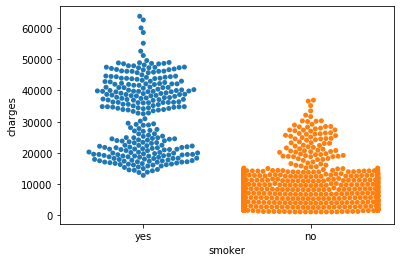

In [178]:
sns.swarmplot(Insurance_data['smoker'], Insurance_data['charges'])

Thus both statistically and graphically, charges of people who smoke differ significantly from the people who don't .

b. Does bmi of males differ significantly from that of females?
Here, Going for a z test again as the sample size > 30.
Firstly, we split the data into two to compare the two sets ie male vs female.

In [179]:
Male = Insurance_data[Insurance_data['sex']=="male"]

In [180]:
Male.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


In [181]:
Female = Insurance_data[Insurance_data['sex']=="female"]

In [182]:
Female.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


Thus we have 2 categories: Male and Female. Assumption is mean difference of the two sample will be 0.
Ho (Null Hypothesis)      : x1_bar = x2_bar (Mean of two samples equal)
Ha (Alternate hypothesis) : x1_bar!= x2_bar (Mean of two samples not equal)

In [183]:
z_statistic2 , p_value2 = stests.ztest (Male['bmi'], Female['bmi'], alternative = 'two-sided')

In [184]:
print ("Z score: " , z_statistic2 , ",  p value:" , p_value2)

Z score:  1.6967526357522242 ,  p value: 0.08974343679943912


z_critical = 1.96 : alpha level of 0.05 and two-tailed test. 
Thus, as we see from above,  Z_score < Z_critical. 
Hence, Since z_stat is less than z_critical we accept the null hypothesis and reject the althernative and conclude that bmi of male and female do not differ significantly.
Also graphically, checking this statement, plotting Smoking vs charges, we can observe the same.

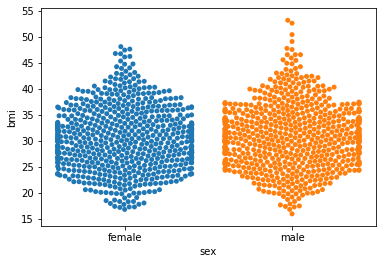

In [185]:
sns.swarmplot(Insurance_data['sex'], Insurance_data['bmi'])

Thus both statistically and graphically, bmi of male and female do not differ significantly.

c . Is the proportion of smokers significantly different in different genders?
We use the chi-square test of independence to find out the difference of categorical variables.
Ho (Null Hypothesis)      : Proportion of smokers is same in male and female
Ha (Alternate hypothesis) : Proportion of smokers is not same in male and female
Here we select α = 0.05

In [186]:
# First getting count of male and female smokers and non smokers:
Male_smoker = Insurance_data[(Insurance_data['sex']=="male")&(Insurance_data['smoker']=="yes")]
Male_non_smoker = Insurance_data[(Insurance_data['sex']=="male")&(Insurance_data['smoker']=="no")]
Female_smoker = Insurance_data[(Insurance_data['sex']=="female")&(Insurance_data['smoker']=="yes")]
Female_non_smoker = Insurance_data[(Insurance_data['sex']=="female")&(Insurance_data['smoker']=="no")]

In [187]:
#obtaining counts of the male and female smokers and non smokers:
ms = Male_smoker.shape[0]
mns = Male_non_smoker.shape[0]
fs = Female_smoker.shape[0]
fns = Female_non_smoker.shape[0]

In [188]:
# Chi-square test of independence.
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency([[ms,mns],[fs,fns]])
print ("Chi-square statistic :", chi_sq_Stat, " , P value :" , p_value , ", Degrees of freedom :" ,deg_freedom)

Chi-square statistic : 7.3929108145999605  , P value : 0.006548143503580674 , Degrees of freedom : 1


Here, p value is 0.006548143503580674 and this is less than Alpha = 0.05. Since p<Alpha, we reject the null hypothesis.
Hence, statistically concluding proportion of smokers is not same in male and females.

d. Is the distribution of bmi across women with no children, one child and two children, the same? 

In [ ]:
Here we use ANOVA as there is multiple samples involved: Women with no children, one child and two children.
Here we make the following assumptions:
1. All the samples follow normal distribution
2. The samples have the same variance
3. samples are random and independent of each other

In [199]:
# Seperating out data for women with no children, one child and two children
No_child = Insurance_data[(Insurance_data['sex']=="female")&(Insurance_data['children']==0)]
No_child.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
13,56,female,39.82,0,no,southeast,11090.71780


In [201]:
One_child = Insurance_data[(Insurance_data['sex']=="female")&(Insurance_data['children']==1)]
One_child.head()

,age,sex,bmi,children,smoker,region,charges
6,46,female,33.44,1,no,southeast,8240.5896
16,52,female,30.78,1,no,northeast,10797.3362
21,30,female,32.40,1,no,southwest,4149.7360
23,34,female,31.92,1,yes,northeast,37701.8768
58,53,female,22.88,1,yes,southeast,23244.7902


In [256]:
Two_child = Insurance_data[(Insurance_data['sex']=="female")&(Insurance_data['children']==2)]
Two_child.head()

,age,sex,bmi,children,smoker,region,charges
27,55,female,32.775,2,no,northwest,12268.63225
41,31,female,36.630,2,no,southeast,4949.75870
43,37,female,30.800,2,no,southeast,6313.75900
46,18,female,38.665,2,no,northeast,3393.35635
51,21,female,33.630,2,no,northwest,3579.82870


In [212]:
# Calculating the mean of the 3 categories:
m1 = No_child['bmi'].mean()
m2 = One_child['bmi'].mean()
m3 = Two_child['bmi'].mean()
print("m1 :", m1, " , m2 :", m2, " , m3 :", m3)

m1 : 30.361522491349486  , m2 : 30.05265822784811  , m3 : 30.64978991596637


In [270]:
bmi_df = pd.DataFrame()

df1 = pd.DataFrame({'children': '0', 'bmi':No_child['bmi']})
df2 = pd.DataFrame({'children': '1', 'bmi':One_child['bmi']})
df3 = pd.DataFrame({'children': '2', 'bmi':Two_child['bmi']})
d=df1
d=d.append(df2)
d=d.append(df3)

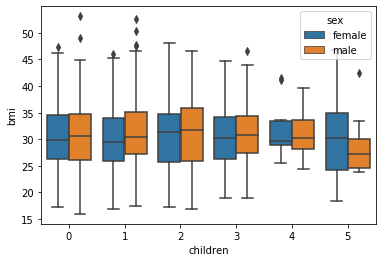

In [265]:
sns.boxplot(x="children",  
            y="bmi",
            hue="sex",
            data=Insurance_data)

Here the box plots look similar for females of bmi 0 , 1 and 2.

Ho (Null Hypothesis)         : Mean1 = Mean2 = Mean3.
Ha (Alternate hypothesis)    : Atleast one mean differs
where Mean1 Mean2 and Mean3 are the mean bmi of women with 0, 1 and 2 children respectively.
We select Alpha = 0.05.

In [266]:
# Calculating p value using ANOVA table:
stats.f_oneway(df1, df2, df3)

F_onewayResult(statistic=array([2.30161205e+15, 3.34472015e-01]), pvalue=array([0.        , 0.71585799]))

Since p value > Alpha, ie 0.7 > 0.05 , we accept null hypothesis. ie distribution of bmi across women with no children, one child and two children are the same.

In [271]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(d['bmi'], d['children']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8494 -1.7186 1.1008  False
     0      2   0.2883 0.8942 -1.2636 1.8402  False
     1      2   0.5971 0.6797 -1.1323 2.3265  False
---------------------------------------------------


Inference:
No Children Vs 1 child: Since the result - reject is false, bmi is statistically equal for women with no child and 1 child.

0 child Vs 2 child: Since the result - reject is false, bmi is statistically equal for women with no child and 2 child.

1 child Vs 2 child: Since the result - reject is false, bmi is statistically equal for women with 1 child and 2 child.